In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
import scipy

dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])
dataLI["planet_name"] = planet_name_LI

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")
pure_rock         = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\pure-Rock (100% MgSiO3).txt",delimiter = "\t")
H20_50_300K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_300 K_1mili-bar surface temprture.txt",delimiter = "\t")
H20_50_500K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_500 K_1mili-bar surface temprture.txt",delimiter = "\t")
H20_50_700K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_700 K_1mili-bar surface temprture.txt",delimiter = "\t")


## Setup

In [3]:
# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))
period_EA            = dataEA.pl_orbper          # [days]

radius_EA            = dataEA.pl_rade            # [Earth Radius]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.

mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature

In [38]:
EA_planets = []
for i in range(0,len(planet_name_EA)):
    if radius_EA[i]<5 and isinstance(st_spectype_EA[i],str) and "M" in st_spectype_EA[i]:
        relative_uncertainty_mass    = (mass_unc_up_EA[i] - mass_unc_low_EA[i]) / (2 * mass_EA[i])
        relative_uncertainty_density = (density_unc_up_EA[i] - density_unc_low_EA[i]) / (2 * density_EA[i])
        if relative_uncertainty_mass < 0.30 and relative_uncertainty_density < 0.30:
            EA_planets.append(planet_name_EA[i])
            
EA_add_index = [5209,5210,5211,5212,5213,5214,5215]
for i in EA_add_index:
    EA_planets.append(planet_name_EA[i])

In [31]:
def find_planet_index(name):
    return (list(planet_name_EA).index(name))

name_find  = "LHS 1140 b"
index_mark = find_planet_index(name_find)
relative_uncertainty_mass    = (mass_unc_up_EA[index_mark] - mass_unc_low_EA[index_mark]) / (2 * mass_EA[index_mark])
relative_uncertainty_density = (density_unc_up_EA[index_mark] - density_unc_low_EA[index_mark]) / (2 * density_EA[index_mark])

print(name_find,index_mark,list(st_spectype_EA)[index_mark])
print(relative_uncertainty_mass,relative_uncertainty_density)

EA_add_index = [5209,5210,5211,5212,5213,5214,5215]

LHS 1140 b 4680 M4.5 V
0.07053291536050157 0.1019900497512438


In [41]:
planet      = []
planet_i    = []
radius      = []
radius_up   = []
radius_low  = []
mass        = []
mass_up     = []
mass_low    = []
density     = []
density_up  = []
density_low = []

for i in range(0,len(EA_planets)):
    index  = list(planet_name_EA).index(EA_planets[i])
    planet.append(dataEA.pl_name[index])
    planet_i.append(i)
    radius.append(dataEA.pl_rade[index])
    radius_up.append(dataEA.pl_radeerr1[index])
    radius_low.append(dataEA.pl_radeerr2[index])
    
    density.append(dataEA.pl_dens[index])
    density_up.append(dataEA.pl_denserr1[index])
    density_low.append(dataEA.pl_denserr2[index])
    
    mass.append(dataEA.pl_bmasse[index])
    mass_up.append(dataEA.pl_bmasseerr1[index])
    mass_low.append(dataEA.pl_bmasseerr2[index])

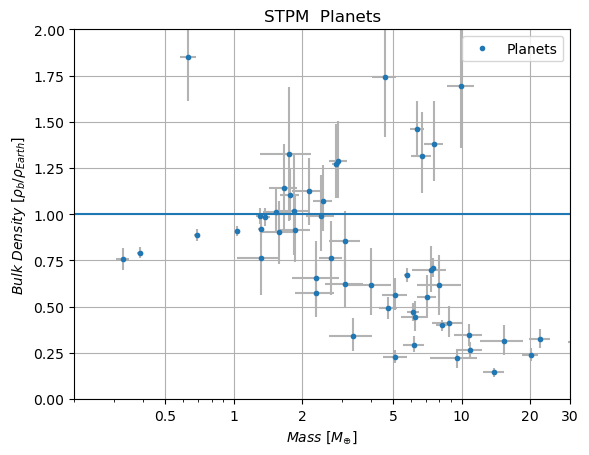

In [42]:
earth_density    = 5.51   # [g/cm**3]
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

plt.plot(mass,np.divide(density,earth_density),".",label = "Planets")
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.title("STPM  Planets")
plt.ylim(0,2)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2],["0.1","0.2","0.3","0.4","0.5","0.75","1","1.5","2"],minor=False)

leg = plt.legend()
plt.hlines(1,0,30)
plt.grid()
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

## K-Means Clustering

C:\Users\silke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


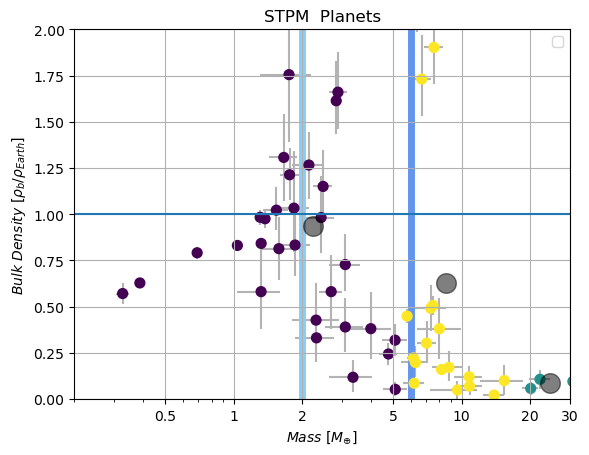

In [46]:
X = np.transpose([mass,(np.divide(density,earth_density))**2])

from sklearn.cluster import KMeans

n_clusters = 3
n_init     = 10
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.errorbar(mass,(np.divide(density,earth_density))**2,xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.title("STPM  Planets")
plt.ylim(0,2)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2],["0.1","0.2","0.3","0.4","0.5","0.75","1","1.5","2"],minor=False)
plt.hlines(1,0,30)
plt.vlines(2,0,2,colors = "lightskyblue",zorder=-32,linewidth = 5)
plt.vlines(6,0,2,colors = "cornflowerblue",zorder=-32,linewidth = 5)

plt.grid()

C:\Users\silke\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\silke\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:411: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\silke\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\silke\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:416: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


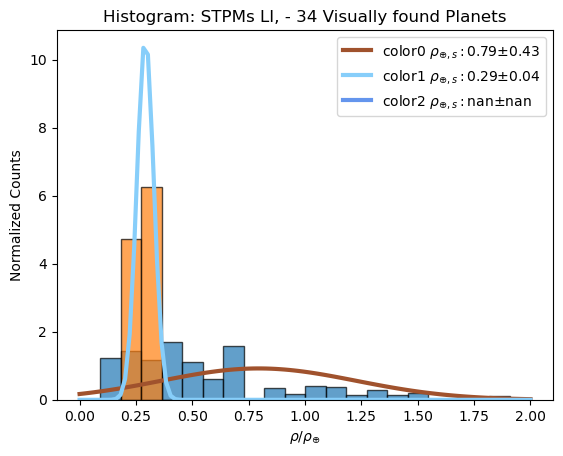

In [100]:
weights = 1 / np.divide(density_err,earth_density)

color0  = []
color1  = []
color2  = []

weight0 = []
weight1 = []
weight2 = []

for i in range(0,len(y_kmeans)):
    if y_kmeans[i] == 0:
        color0.append(np.divide(density[i],earth_density))
        weight0.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )
    if y_kmeans[i] == 1: 
        color1.append(np.divide(density[i],earth_density))
        weight1.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )
    if y_kmeans[i] == 2: 
        color2.append(np.divide(density[i],earth_density))
        weight2.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )

bins  = np.linspace(0, 2, 23)
pbins = np.linspace(0, 2, 100)
plt.hist(color0, bins=bins, weights=weight0, alpha=0.7, edgecolor='black',density = True)
plt.hist(color1, bins=bins, weights=weight1, alpha=0.7, edgecolor='black',density = True)
plt.hist(color2, bins=bins, weights=weight2, alpha=0.7, edgecolor='black',density = True)

mu, sigma = scipy.stats.norm.fit(color0)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="color0 "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu, sigma = scipy.stats.norm.fit(color1)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="color1 "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu, sigma = scipy.stats.norm.fit(color2)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="color2 "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

for line in leg.get_lines():
    line.set_linewidth(8.0)
leg = plt.legend()
plt.xlabel('$ρ / ρ_{⊕}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LI, - 34 Visually found Planets')
plt.show()

In [76]:
color1

[0.23956442831215974, 0.3266787658802178, 0.308529945553539]